In [1]:
# Импортируем библиотеки для практической работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Создаем папку для графиков
os.makedirs('figures', exist_ok=True)

print("Библиотеки импортированы, папка `figures` проверена.")

Библиотеки импортированы, папка `figures` проверена.


In [2]:
# Загружаем датасет
df = pd.read_csv('S02-hw-dataset.csv')

# Выводим первые несколько строк
display(df.head())

# Информация о типах данных
print("\n--- Info ---")
df.info()

# Обобщённая статистика
print("\n--- Describe ---")
display(df.describe())

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

--- Describe ---


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [3]:
print("--- Анализ пропусков ---")
# Количество nullable-значений
print(df.isna().mean())

print("\n--- Анализ дубликатов ---")
# Количество дубликатов
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {duplicates}")

# Показываем дубликаты
display(df[df.duplicated(keep=False)])

print("\n--- Поиск подозрительных значений ---")
# Отрицательные покупки
purchases = df[df['purchases'] < 0]
print(f"Отрицательные покупки ({len(purchases)}):\n")
display(purchases)

# Слишком большой или слишком маленький возраст
suspicious_age = df[(df['age'] > 100) | (df['age'] < 10)]
print(f"Подозрительный возраст ({len(suspicious_age)}):")
display(suspicious_age)

# Нулевой доход при наличии покупок?
zero_revenue_buy = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
print(f"Количество покупок с нулевой выручкой ({len(zero_revenue_buy)}):")
display(zero_revenue_buy)

--- Анализ пропусков ---
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

--- Анализ дубликатов ---
Количество полных дубликатов строк: 1


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511



--- Поиск подозрительных значений ---
Отрицательные покупки (1):



,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Подозрительный возраст (2):


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


Количество покупок с нулевой выручкой (1):


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [4]:
# Частоты по странам
print("--- Распределение клиентов по странам ---")
print(df['country'].value_counts())

# Средняя выручка и средний возраст по странам
country_stats = df.groupby('country').agg(
    {
        'revenue': ['count', 'mean', 'sum'],
        'age': 'mean',
        'purchases': 'mean'
    }
).round(1)

print("\n--- Статистика по странам ---")
display(country_stats)

--- Распределение клиентов по странам ---
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

--- Статистика по странам ---


revenue                  age purchases
          count    mean    sum  mean      mean
country                                       
CN            2  1054.0   2108  24.0       4.5
DE            6  1445.5   8673  34.6       6.5
FR           12   675.9   8111  46.2       4.2
RU           13   790.1  10271  30.1       4.8
US            8   557.4   4459  36.7       4.6

Наблюдения EDA:
- Больше всего клиентов из России (13) и Франции (12);
- Германия показывает высокую среднюю выручку, несмотря на меньшее количество клиентов;
- Меньше всего клиентов из Китая.

График сохранен в файл: figures/eda_plots.png


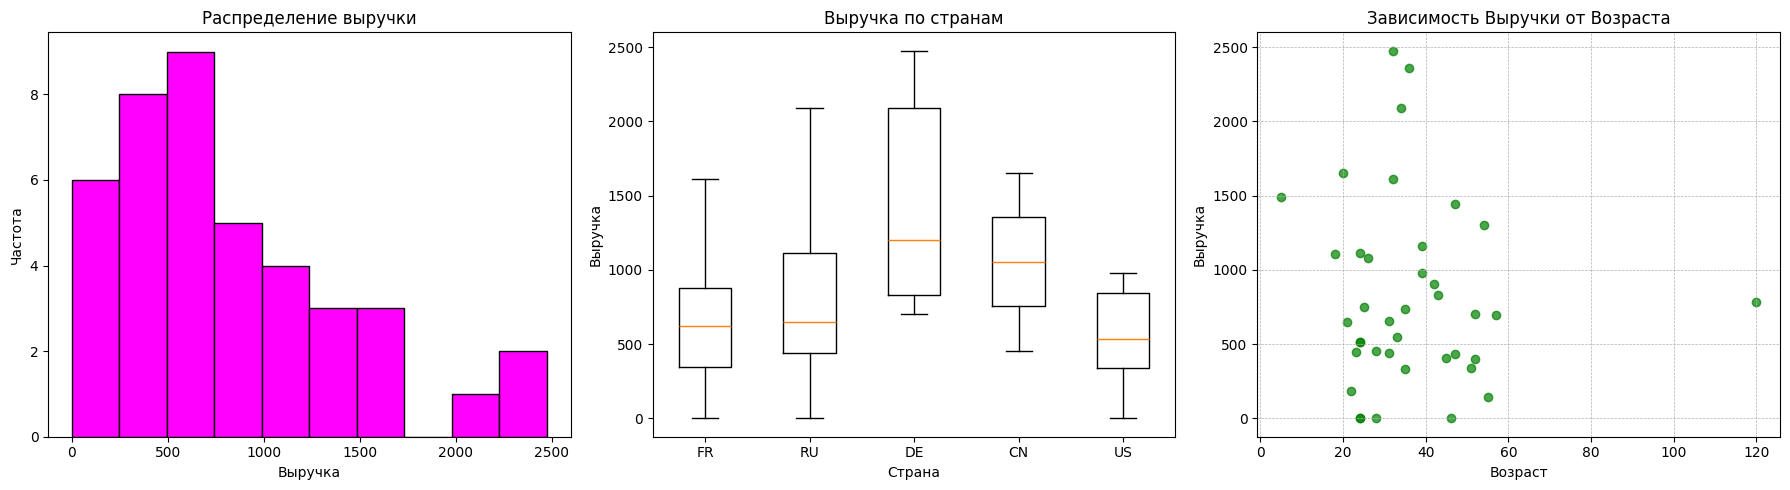

In [6]:
# Настройка размера графиков
plt.figure(figsize=(18, 5))

# Гистограмма распределения выручки
plt.subplot(1, 3, 1)
plt.hist(df['revenue'], bins=10, color='magenta', edgecolor='black')
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Частота')

# Выручка по странам
plt.subplot(1, 3, 2)
countries = df['country'].unique()
data_to_plot = [df[df['country'] == c]['revenue'] for c in countries]
plt.boxplot(data_to_plot, tick_labels=countries)
plt.title('Выручка по странам')
plt.xlabel('Страна')
plt.ylabel('Выручка')

# Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(df['age'], df['revenue'], alpha=0.7, c='green')
plt.title('Зависимость Выручки от Возраста')
plt.xlabel('Возраст')
plt.ylabel('Выручка')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Корректировка макета
plt.tight_layout()

# Сохраняем график
save_path = 'figures/eda_plots.png'
plt.savefig(save_path)
print(f"График сохранен в файл: {save_path}")

plt.show()

# Выводы по графикам

Основываясь на представленных графиках, можно сделать следующие выводы:

## 1. Распределение выручки (Гистограмма слева)

Неравномерность: Распределение не является нормальным и скошено вправо.
Основной сегмент: Чаще всего выручка с одного клиента попадает в диапазон 500–750. Также значительная часть клиентов приносит небольшую выручку (0–250).
Существует небольшая группа клиентов с очень высокой выручкой (в диапазоне 2000–2500)

## 2. Выручка по странам (Boxplot в центре)

Лидер: Германия показывает самую высокую медианную выручку и высокие показатели в целом (box расположен выше остальных).
Разброс: У России самый большой разброс значений - от 0 до более чем 2000. Это значит, что там есть как не платящие пользователи, так и очень крупные клиенты.
Аутсайдеры: Медианная выручка в США и Франции заметно ниже, чем в Германии. В США разброс значений самый компактный (меньше всего дорогих покупок).

## 3. Зависимость выручки от возраста (Scatter plot справа)

Отсутствие корреляции: Явной линейной зависимости между возрастом и выручкой не наблюдается (точки разбросаны хаотично).
Платежеспособный возраст: Самые высокие чеки (>2000) приходятся на возрастную группу примерно 20–40 лет.
Аномалии: На графике четко видны выбросы в данных по возрасту — точка на отметке 120 лет (ошибка ввода или тестовый аккаунт) и точка около 5 лет, при этом оба совершали покупки.